In [18]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


INTERIM_PATH="data/interim/ENIGH"
RAW_PATH="data/raw/DATOS EDUCACION/ENCUESTA NACIONAL DE INGRESOS Y GASTOS EN LOS HOGARES/Extracted"


In [2]:
os.chdir('..')

## Most/least illiterate state

In [3]:
data_path=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"
df_2022=pd.read_csv(data_path)

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_33689/656313294.py:2: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(data_path)


In [4]:
df_2022=df_2022[ [
                'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
                'madre_hog', 'madre_id', 'padre_hog','alfabetism',
                'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
                'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
                'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id','peso',
                'entidad'
                ] ]

In [5]:
state=df_2022[['entidad','edad','alfabetism']]
state=state[state['alfabetism']!=' '] # Only people who are 2 or less years old have ' ' registered 

total_state=state.groupby('entidad',as_index=False).value_counts()
total_state=total_state.groupby('entidad',as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})

literacy=state[['entidad','alfabetism']].groupby(['entidad','alfabetism'],as_index=False).value_counts()

literacy=pd.merge(literacy,total_state, how='inner', on='entidad')

state=pd.merge(state,total_state, how='inner', on='entidad')

illiterate=state[state['alfabetism']=='1']
literate=state[state['alfabetism']=='2']


In [6]:
def percentage(data_df,category_column,category_value):
    is_category=data_df[category_column]==category_value
    df=data_df[is_category]
    total_of_category=len(df)
    total_of_registers=len(data_df)
    percentage=round(100*(total_of_category/total_of_registers),2)
    return percentage

In [7]:

literacy=state[['entidad','alfabetism']].groupby(['entidad','alfabetism'],as_index=False).value_counts()

literacy=pd.merge(literacy,total_state, how='inner', on='entidad')
literacy['illiteracy_percentage']=literacy['count']/literacy['total_registers']
literacy['literacy_percentage']=1-literacy['illiteracy_percentage']
literacy['illiteracy_percentage_diff']=abs(literacy['illiteracy_percentage']-literacy['literacy_percentage'])




In [8]:
literacy[:100]

,entidad,alfabetism,count,total_registers,illiteracy_percentage,literacy_percentage,illiteracy_percentage_diff
0,1,1,8608,9424,0.913413,0.086587,0.826825
1,1,2,816,9424,0.086587,0.913413,0.826825
2,2,1,12027,13080,0.919495,0.080505,0.838991
3,2,2,1053,13080,0.080505,0.919495,0.838991
4,3,1,7515,8156,0.921408,0.078592,0.842815
...,...,...,...,...,...,...,...
59,30,2,1197,9077,0.131872,0.868128,0.736256
60,31,1,8815,10082,0.874330,0.125670,0.748661
61,31,2,1267,10082,0.125670,0.874330,0.748661
62,32,1,7801,8629,0.904045,0.095955,0.808089


In [11]:
literacy.alfabetism.unique()

array(['1', '2'], dtype=object)

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_33689/571670485.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend


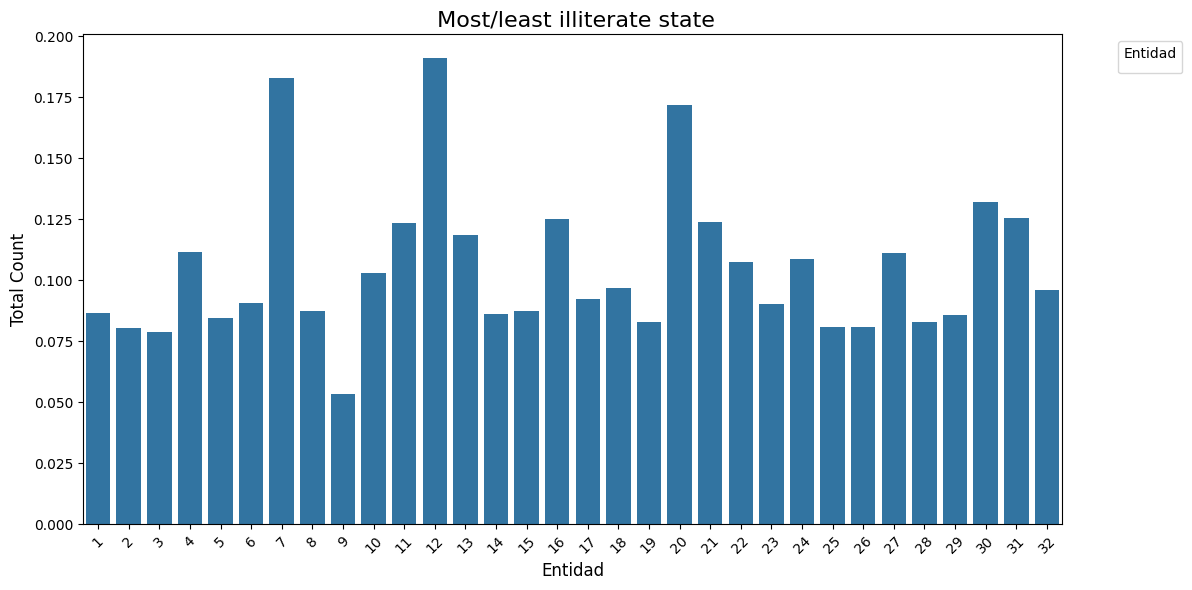

In [12]:
plt.figure(figsize=(12, 6))  
data=literacy[literacy['alfabetism']=='2']
data=data.sort_values('illiteracy_percentage')

sns.barplot(x='entidad', y='illiteracy_percentage', data=data)

plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  


plt.tight_layout()  
plt.show()

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_33689/3978033950.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend


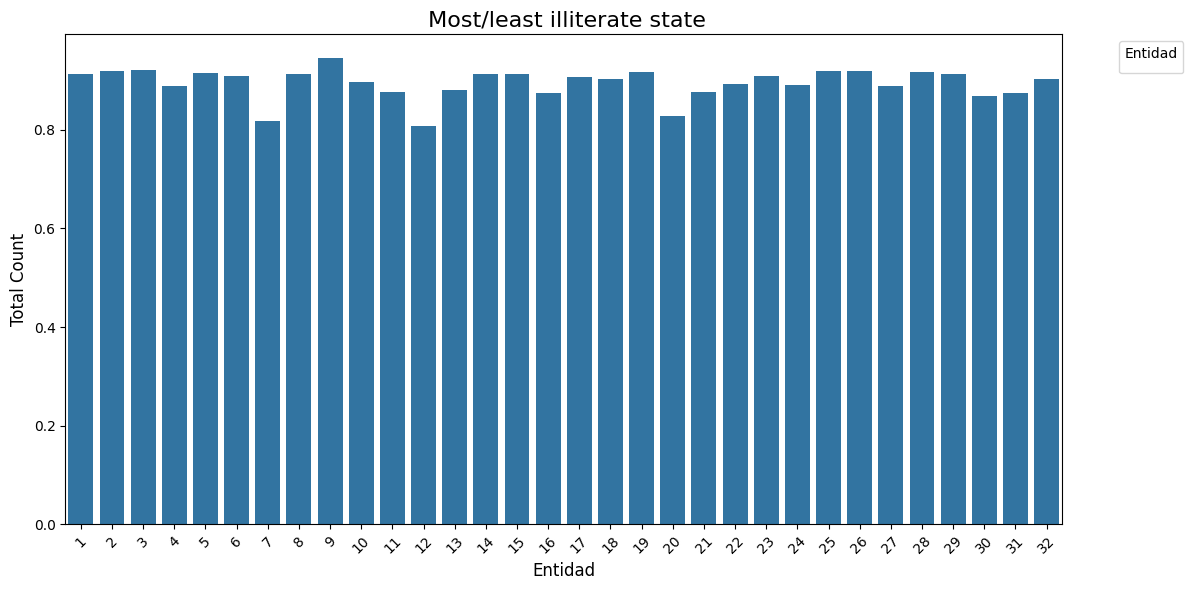

In [13]:
plt.figure(figsize=(12, 6))  # Set the figure size
data=literacy[literacy['alfabetism']=='1']
data=data.sort_values('illiteracy_percentage')
# Using Seaborn for a more elegant bar plot
sns.barplot(x='entidad', y='illiteracy_percentage', data=data)
# Step 3: Customize the plot
plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Step 4: Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [16]:
data

,entidad,alfabetism,count,total_registers,illiteracy_percentage,literacy_percentage,illiteracy_percentage_diff
22,12,1,6899,8530,0.808792,0.191208,0.617585
12,7,1,6387,7815,0.817274,0.182726,0.634549
38,20,1,7269,8777,0.828187,0.171813,0.656375
58,30,1,7880,9077,0.868128,0.131872,0.736256
60,31,1,8815,10082,0.874330,0.125670,0.748661
30,16,1,6411,7329,0.874744,0.125256,0.749488
40,21,1,6842,7811,0.875944,0.124056,0.751888
20,11,1,9627,10983,0.876536,0.123464,0.753073
24,13,1,6373,7229,0.881588,0.118412,0.763176
6,4,1,6533,7354,0.888360,0.111640,0.776720


In [74]:
illiterate_percentage=percentage(state,'alfabetism','1')
illiterate_percentage

89.65

In [75]:
total_interviews=len(df_2022)
total_illiterate=len(illiterate)
total_literate=len(literate)

In [76]:
illiterate=illiterate.groupby('entidad',as_index=False).value_counts()

# Age Groups
bins = range(0, 101, 10)  # Bins for age groups (0-9, 10-19, 20-29, etc.)
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Labels for the bins
illiterate['age_group'] = pd.cut(illiterate['edad'], bins=bins, labels=labels, right=False)

# Totals 



literate=literate.groupby('entidad',as_index=False).value_counts()
bins = range(0, 101, 10)  # Bins for age groups (0-9, 10-19, 20-29, etc.)
labels = [f'{i}-{i+9}' for i in range(0, 100, 10)]  # Labels for the bins
literate['age_group'] = pd.cut(literate['edad'], bins=bins, labels=labels, right=False)

In [77]:
state

,entidad,edad,alfabetism,total_registers
0,1,91,1,9424
1,1,48,1,9424
2,1,13,1,9424
3,1,68,1,9424
4,1,64,1,9424
...,...,...,...,...
298207,32,5,2,8629
298208,32,63,1,8629
298209,32,59,1,8629
298210,32,29,1,8629


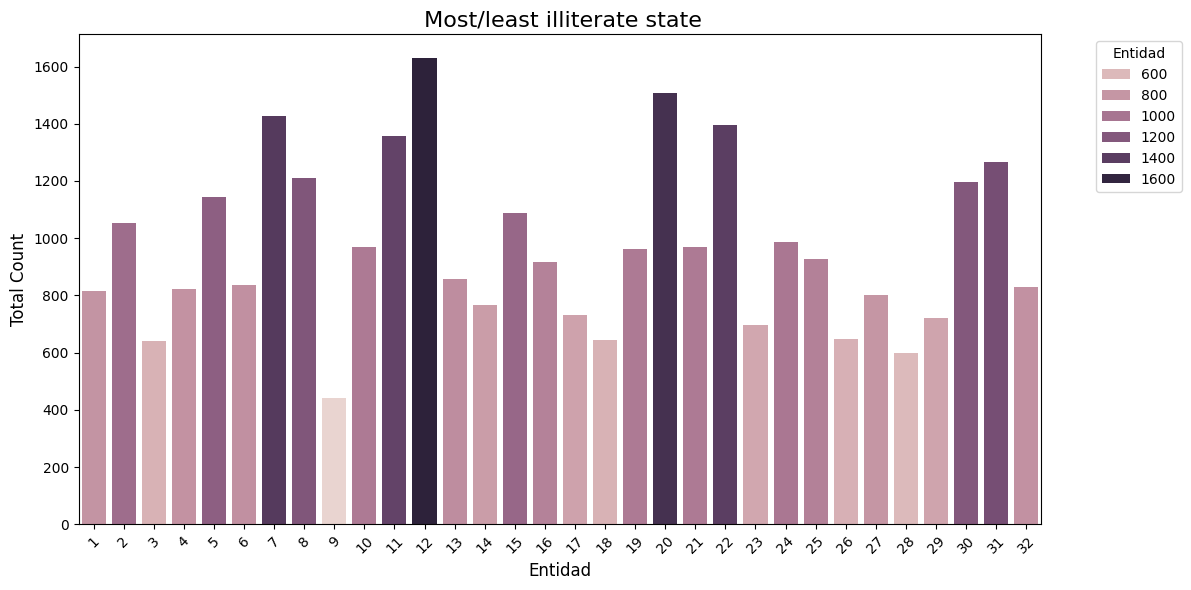

In [78]:
plt.figure(figsize=(12, 6))  # Set the figure size
data=literate.groupby(['entidad'], as_index=False)['count'].sum()
data=data.sort_values(by='count', ascending=False)

# Using Seaborn for a more elegant bar plot
sns.barplot(x='entidad', y='count', hue='count', data=data)
# Step 3: Customize the plot
plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Step 4: Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

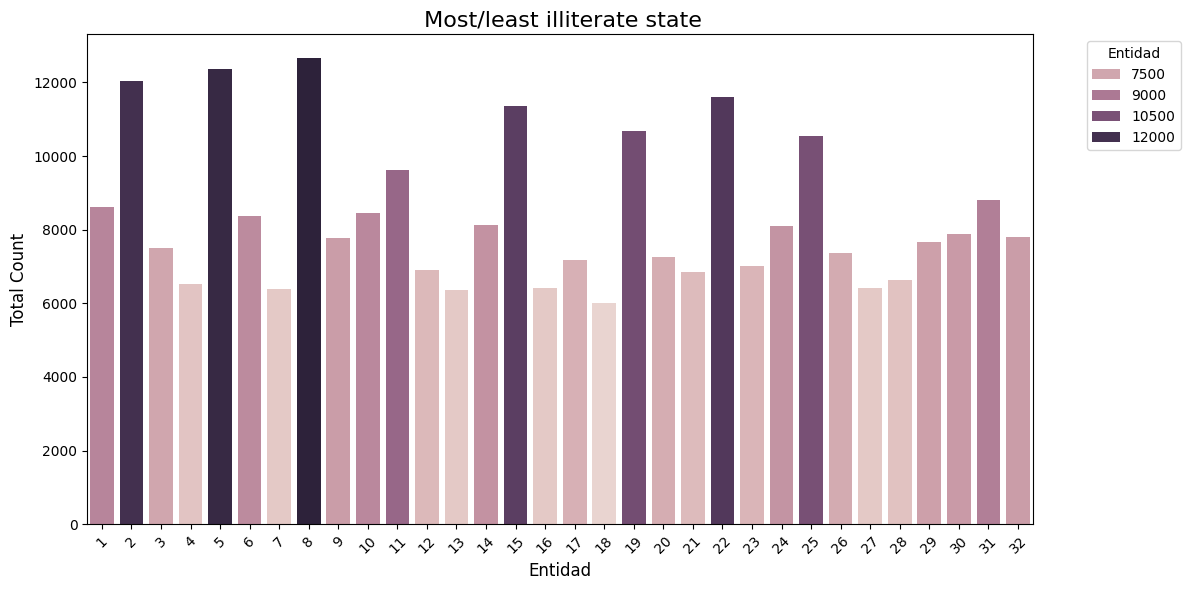

In [79]:
plt.figure(figsize=(12, 6))  # Set the figure size
data=illiterate.groupby(['entidad'], as_index=False)['count'].sum()
data=data.sort_values(by='count', ascending=False)

# Using Seaborn for a more elegant bar plot
sns.barplot(x='entidad', y='count', hue='count', data=data)
# Step 3: Customize the plot
plt.title(' Most/least illiterate state', fontsize=16)
plt.xlabel('Entidad', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Entidad', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend

# Step 4: Show the plot
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

## Type of scholarship has most/least amount of illiteracy

In [4]:
data_path=f"{RAW_PATH}/2022/conjunto_de_datos_poblacion_enigh2022_ns/conjunto_de_datos/conjunto_de_datos_poblacion_enigh2022_ns.csv"
df_2022=pd.read_csv(data_path)

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_16775/656313294.py:2: DtypeWarning: Columns (82,83,166) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(data_path)


In [5]:
df_2022=df_2022[ [
                'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
                'madre_hog', 'madre_id', 'padre_hog','alfabetism',
                'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
                'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
                'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id','peso',
                'entidad'
                ] ]

In [84]:
df_2022[(df_2022['alfabetism']=='2')&(df_2022['tipoesc']!=' ')].nivel.unique()

array(['06', '01', '04'], dtype=object)

In [86]:
df_2022[(df_2022['alfabetism']=='2')&(df_2022['tipoesc']!=' ')]

,folioviv,foliohog,numren,parentesco,sexo,edad,madre_hog,madre_id,padre_hog,alfabetism,...,residencia,edo_conyug,pareja_hog,conyuge_id,peso,entidad,generacion,ing_tri,gasto_tri,income_bill_diff
848,100404204,1,3,301,2,8,1,02,1,2,...,01,,,,1,1,Alpha,59.66,25697.46,-25637.80
855,100404206,1,4,609,2,3,1,02,2,2,...,,,,,1,1,Alpha,7458.56,45488.55,-38029.99
1373,100522703,1,9,501,1,4,1,07,2,2,...,,,,,1,1,Alpha,7032.78,137871.96,-130839.18
1374,100522703,1,9,501,1,4,1,07,2,2,...,,,,,1,1,Alpha,1180.32,137871.96,-136691.64
1679,100573502,1,2,301,1,3,2,,1,2,...,,,,,2,1,Alpha,5282.60,232920.78,-227638.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396663,3260721508,1,6,609,2,9,1,04,1,2,...,32,,,,1,32,Alpha,3961.95,12607.65,-8645.70
396709,3260728306,1,4,301,2,6,1,01,2,2,...,32,,,,1,32,Alpha,586.95,19545.76,-18958.81
396713,3260728309,1,3,301,2,8,1,02,1,2,...,32,,,,2,32,Alpha,14.67,10871.37,-10856.70
396718,3260728511,1,4,301,1,5,1,02,1,2,...,32,,,,1,32,Alpha,53.80,6312.74,-6258.94


In [23]:
state=df_2022[['entidad','edad','alfabetism','tipoesc']]
state=state[state['alfabetism']!=' '] # Only people who are 2 or less years old have ' ' registered 

total_state=state.groupby(['entidad','tipoesc'],as_index=False).value_counts()
total_state=total_state.groupby(['entidad','tipoesc'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})


literacy=state[['entidad','tipoesc','alfabetism']].groupby(['entidad','tipoesc','alfabetism'],as_index=False).value_counts()
literacy=pd.merge(literacy,total_state, how='inner', on=['entidad','tipoesc'])
literacy['illiteracy_percentage']=literacy['count']/literacy['total_registers']
literacy['literacy_percentage']=1-literacy['illiteracy_percentage']
literacy['illiteracy_percentage_diff']=abs(literacy['illiteracy_percentage']-literacy['literacy_percentage'])


#state=pd.merge(state,total_state, how='inner', on='entidad')

illiterate=state[state['alfabetism']=='1']
literate=state[state['alfabetism']=='2']


In [24]:
literacy

,entidad,tipoesc,alfabetism,count,total_registers,illiteracy_percentage,literacy_percentage,illiteracy_percentage_diff
0,1,,1,6143,6501,0.944932,0.055068,0.889863
1,1,,2,358,6501,0.055068,0.944932,0.889863
2,1,1,1,2172,2597,0.836350,0.163650,0.672699
3,1,1,2,425,2597,0.163650,0.836350,0.672699
4,1,2,1,293,326,0.898773,0.101227,0.797546
...,...,...,...,...,...,...,...,...
220,32,1,2,472,2485,0.189940,0.810060,0.620121
221,32,2,1,149,163,0.914110,0.085890,0.828221
222,32,2,2,14,163,0.085890,0.914110,0.828221
223,32,3,1,4,6,0.666667,0.333333,0.333333


## Trimestral bills/income of illiterate and literate people

In [19]:
data_path=f"{INTERIM_PATH}/2022.csv"
df_2022=pd.read_csv(data_path)
df_2022=df_2022[ [
                'folioviv', 'foliohog', 'numren', 'parentesco', 'sexo', 'edad',
                'madre_hog', 'madre_id', 'padre_hog','alfabetism',
                'asis_esc', 'nivel', 'grado', 'tipoesc', 'tiene_b', 'otorg_b',
                'forma_b', 'tiene_c', 'otorg_c', 'forma_c', 'nivelaprob', 'gradoaprob',
                'antec_esc', 'residencia', 'edo_conyug', 'pareja_hog', 'conyuge_id','peso',
                'entidad','generacion',


                'ing_tri','gasto_tri'
                ] ]

/var/folders/m5/26l5nfs54r94_664jm4k6zvr0000gn/T/ipykernel_33689/128548314.py:2: DtypeWarning: Columns (11,12,13,14,15,16,17,18,27,31,32,33,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022=pd.read_csv(data_path)


In [20]:
df_2022['income_bill_diff']=df_2022['ing_tri']-df_2022['gasto_tri']

In [21]:
state=df_2022[['folioviv','sexo','numren','edad','generacion','income_bill_diff',
                'entidad','ing_tri','alfabetism']]
state=state[state['alfabetism']!=' '] # Only people who are 2 or less years old have ' ' registered 


total_state=state.groupby(['entidad','ing_tri'],as_index=False).value_counts()
total_state=total_state.groupby(['entidad','ing_tri'],as_index=False)['count'].sum()
total_state=total_state.rename(columns={'count':'total_registers'})


literacy=state[['folioviv','sexo','numren','edad',
                'entidad','ing_tri','generacion','alfabetism']].groupby(['folioviv','numren','edad',],as_index=False)







In [22]:
literacy

In [23]:
average_trimester_income=state[['sexo',
                'entidad','ing_tri','income_bill_diff','generacion','alfabetism']].groupby(['entidad','alfabetism','generacion','sexo'],as_index=False)['ing_tri'].mean()

average_trimester_income.rename(columns={'ing_tri': 'avg_income'}, inplace=True)

In [24]:
average_trimester_income

,entidad,alfabetism,generacion,sexo,avg_income
0,1,1,Alpha,1,1322.390980
1,1,1,Alpha,2,2564.307683
2,1,1,Baby Boomer,1,20012.431399
3,1,1,Baby Boomer,2,11983.274067
4,1,1,Milenial,1,15817.308824
...,...,...,...,...,...
879,32,2,Silent,2,4543.830702
880,32,2,X,1,8390.856531
881,32,2,X,2,5963.155517
882,32,2,Z,1,8870.931429


In [57]:
average_trimester_income[average_trimester_income['entidad']==1]

,entidad,alfabetism,generacion,sexo,avg_income
0,1,1,Alpha,1,1322.390980
1,1,1,Alpha,2,2564.307683
2,1,1,Baby Boomer,1,20012.431399
3,1,1,Baby Boomer,2,11983.274067
4,1,1,Milenial,1,15817.308824
5,1,1,Milenial,2,11514.803696
6,1,1,Silent,1,11862.322570
7,1,1,Silent,2,7418.934516
8,1,1,X,1,17222.736647
9,1,1,X,2,11566.581725


In [70]:
max_trimester_income=state[['sexo',
                'entidad','ing_tri','income_bill_diff','generacion','alfabetism']].groupby(['entidad','alfabetism','generacion','sexo'],as_index=False)['ing_tri'].max()

max_trimester_income.rename(columns={'ing_tri': 'max_income'}, inplace=True)

In [73]:
max_trimester_income[max_trimester_income['entidad']==1].sort_values('max_income')

,entidad,alfabetism,generacion,sexo,max_income
24,1,2,Z,2,4131.14
16,1,2,Greatest,1,5593.92
0,1,1,Alpha,1,8852.45
13,1,2,Alpha,2,11739.13
12,1,2,Alpha,1,12717.39
18,1,2,Milenial,2,12942.39
20,1,2,Silent,2,17608.69
15,1,2,Baby Boomer,2,19093.92
1,1,1,Alpha,2,23867.40
23,1,2,Z,1,25434.78


In [58]:
average_trimester_diff=state[['sexo',
                'entidad','ing_tri','income_bill_diff','generacion','alfabetism']].groupby(['entidad','alfabetism','generacion','sexo'],as_index=False)['income_bill_diff'].mean()

average_trimester_diff.rename(columns={'ing_tri': 'avg_income'}, inplace=True)

In [67]:
average_trimester_diff[average_trimester_diff['entidad']==1]


,entidad,alfabetism,generacion,sexo,income_bill_diff
0,1,1,Alpha,1,-42336.737451
1,1,1,Alpha,2,-44773.691707
2,1,1,Baby Boomer,1,-25006.179862
3,1,1,Baby Boomer,2,-31128.279346
4,1,1,Milenial,1,-36326.129109
5,1,1,Milenial,2,-42735.498152
6,1,1,Silent,1,-25178.477151
7,1,1,Silent,2,-20736.552968
8,1,1,X,1,-31007.322671
9,1,1,X,2,-35227.533719


In [69]:
(average_trimester_diff[average_trimester_diff['entidad']==1]).sort_values('income_bill_diff')

,entidad,alfabetism,generacion,sexo,income_bill_diff
13,1,2,Alpha,2,-49220.385370
12,1,2,Alpha,1,-47783.696071
1,1,1,Alpha,2,-44773.691707
5,1,1,Milenial,2,-42735.498152
0,1,1,Alpha,1,-42336.737451
11,1,1,Z,2,-42258.573041
23,1,2,Z,1,-39266.904167
24,1,2,Z,2,-38630.175000
10,1,1,Z,1,-37690.932034
4,1,1,Milenial,1,-36326.129109


In [65]:
average_trimester_diff[average_trimester_diff['income_bill_diff']>0]

,entidad,alfabetism,generacion,sexo,income_bill_diff
145,6,2,Greatest,2,508.490000
387,14,1,Greatest,2,3741.290000
530,19,2,Greatest,2,1902.993333
861,32,1,Greatest,1,4009.530000


In [25]:
average_trimester_income

,entidad,alfabetism,generacion,sexo,avg_income
0,1,1,Alpha,1,1322.390980
1,1,1,Alpha,2,2564.307683
2,1,1,Baby Boomer,1,20012.431399
3,1,1,Baby Boomer,2,11983.274067
4,1,1,Milenial,1,15817.308824
...,...,...,...,...,...
879,32,2,Silent,2,4543.830702
880,32,2,X,1,8390.856531
881,32,2,X,2,5963.155517
882,32,2,Z,1,8870.931429


In [54]:
average_trimester_income['alfabetism']=average_trimester_income['alfabetism'].astype('int')
average_trimester_income['Literacy'] = average_trimester_income['alfabetism'].apply(lambda x: 'Illiterate' if x == 2 else ('Literate' if x == 1 else None))
generation_order = ['Silent','Greatest','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']
average_trimester_income['Generation'] = pd.Categorical(average_trimester_income['generacion'], categories=generation_order, ordered=True)


In [53]:
average_trimester_income.generacion.unique()

array(['Alpha', 'Baby Boomer', 'Milenial', 'Silent', 'X', 'Z', 'Greatest'],
      dtype=object)

In [55]:
average_trimester_income

,entidad,alfabetism,generacion,sexo,avg_income,Literacy,Generation
0,1,1,Alpha,1,1322.390980,Literate,Alpha
1,1,1,Alpha,2,2564.307683,Literate,Alpha
2,1,1,Baby Boomer,1,20012.431399,Literate,Baby Boomer
3,1,1,Baby Boomer,2,11983.274067,Literate,Baby Boomer
4,1,1,Milenial,1,15817.308824,Literate,Milenial
...,...,...,...,...,...,...,...
879,32,2,Silent,2,4543.830702,Illiterate,Silent
880,32,2,X,1,8390.856531,Illiterate,X
881,32,2,X,2,5963.155517,Illiterate,X
882,32,2,Z,1,8870.931429,Illiterate,Z


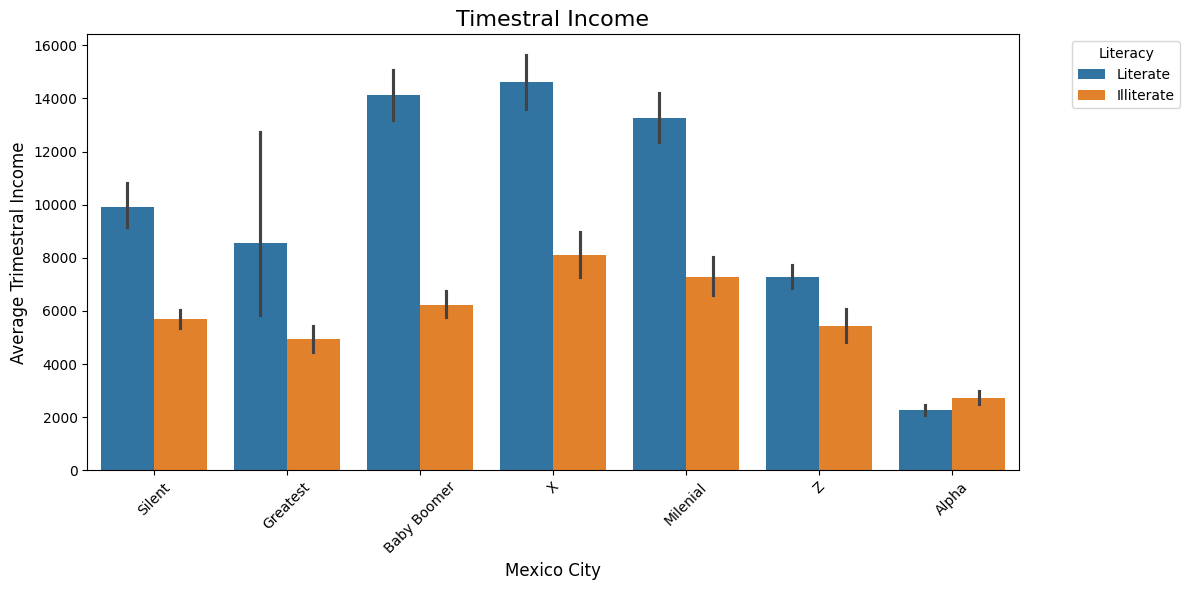

In [56]:

plt.figure(figsize=(12, 6))  
data=average_trimester_income

sns.barplot(x='Generation', y='avg_income',hue='Literacy', data=data)

plt.title('Timestral Income', fontsize=16)
plt.xlabel('Mexico City', fontsize=12)
plt.ylabel('Average Trimestral Income(Pesos)', fontsize=12)
plt.xticks(rotation=45)  
plt.legend(title='Literacy', bbox_to_anchor=(1.05, 1), loc='upper left')  


plt.tight_layout()  
plt.show()

## Ages/Generations with illiteracy

In [ ]:
bins = [1901,1924,1945, 1964, 1980, 1996, 2012, 2024 ]  # Define the edges of the bins
labels = ['Greatest','Silent','Baby Boomer', 'X', 'Milenial', 'Z','Alpha']  # Define labels for the categories

df['año_nacimiento']=int(2022)-df['edad']
df['generacion'] = pd.cut(df['año_nacimiento'], bins=bins, labels=labels, right=True)